# Covid-19 (Coronavirus) 
## Tracker for Locations with Friends & Family

Note - All data was gathered and prepared on the [Covid19_Data_ETL.ipynb](https://github.com/BrianLeip/CoronaVirus/blob/master/Covid19_Data_ETL.ipynb) notebook prior to loading into this notebook, following standard best practices for data analytics.

## Data Sources

### Primary Data Source: Johns Hopkins CSSE Data Repository 
- Link: https://github.com/CSSEGISandData/COVID-19  
- **Live data:**
    - Countries (cases, deaths, recoveries, active)
    - US States (cases, deaths)
    - US County (cases, deaths)
- **Historic time series data:**
    - Countries (cases, deaths, recoveries, active)
    - US States (cases, deaths)
    - US Counties (cases, deaths)

### US State Testing and Hospitalizations: Covid Tracking Project 
- Link: https://covidtracking.com/data/ 
- **Live data:**
    - US State testing and hospitalization, ICU stats
- **Historic time series data:**
    - US State testing and hospitalization, ICU stats

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import os
import seaborn as sns

In [2]:
sns.set()
sns.set_style("whitegrid")
sns.set_palette("Paired")

## Load the Data
See the Covid19_Data_ETL notebook for info on the data gathering and wrangling process.  
All original data left unchanged, only the format was changed to make it preferable to work with for EDA and Data Viz

### Dataset 1: John Hopkins

In [3]:
jh_live_global = pd.read_csv('Datasets/JH/orig/jh_live_global_orig.csv')

In [4]:
jh_live_countries = pd.read_csv('Datasets/JH/jh_live_countries.csv', index_col=0)

In [5]:
jh_live_usstates = pd.read_csv('Datasets/JH/jh_live_usstates.csv', index_col=0)

In [6]:
jh_live_uscounties = pd.read_csv('Datasets/JH/jh_live_uscounties.csv', index_col=[0,1])

In [7]:
jh_hist_countries_cases = pd.read_csv('Datasets/JH/jh_hist_countries_cases.csv', index_col=0, parse_dates=True)

In [8]:
jh_hist_countries_deaths = pd.read_csv('Datasets/JH/jh_hist_countries_deaths.csv', index_col=0, parse_dates=True)

In [9]:
jh_hist_countries_recovered = pd.read_csv('Datasets/JH/jh_hist_countries_recovered.csv', index_col=0, parse_dates=True)

In [10]:
jh_hist_usstates_cases = pd.read_csv('Datasets/JH/jh_hist_usstates_cases.csv', index_col=0, parse_dates=True)

In [11]:
jh_hist_usstates_deaths = pd.read_csv('Datasets/JH/jh_hist_usstates_deaths.csv', index_col=0, parse_dates=True)

In [12]:
jh_hist_uscounties_cases = pd.read_csv('Datasets/JH/jh_hist_uscounties_cases.csv', index_col=0, header=[0,1], parse_dates=True)

In [13]:
jh_hist_uscounties_deaths = pd.read_csv('Datasets/JH/jh_hist_uscounties_deaths.csv', index_col=0, header=[0,1], parse_dates=True)

### Dataset 2: Covid Tracking Project

PENDING

## Prep Some Commonly Used Data (e.g. current date for each dataset)

In [14]:
jh_live_date = jh_live_global['Last_Update'][7] # The 0th item is not updated (Diamond princess) so grab one that is updated instead.
jh_live_date = pd.to_datetime(jh_live_date)
jh_live_date = pd.Timestamp(jh_live_date.year, jh_live_date.month, jh_live_date.day)
jh_live_date

Timestamp('2020-12-12 00:00:00')

In [15]:
jh_hist_date = jh_hist_countries_cases.index[-1]
jh_hist_date

Timestamp('2020-12-11 00:00:00')

In [16]:
# Date to zoom in on for charting recent data
zoom_date1 = '3/15/2020'
zoom_date2 = '4/1/2020'
zoom_date3 = '4/15/2020'
zoom_date4 = '5/1/2020'
zoom_date5 = '5/15/2020'
zoom_date6 = '6/1/2020'
zoom_date7 = '6/15/2020'
zoom_date8 = '7/1/2020'

## Exploratory Data Analysis (EDA)

### Global and Country Level

In [17]:
# Total Global confirmed cases, deaths, recovered, and active (live)
pd.DataFrame(jh_live_countries[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum() )

,0
Confirmed,71081574
Deaths,1594777
Recovered,45349922
Active,24136875


In [18]:
# Top countries by confirmed count as of latest date
top_countries = jh_live_countries.nlargest(12, 'Confirmed')
top_countries.head()

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long
Country_Region,,,,,,,
US,15842789,295450,6135314,9412025,2020-12-12 05:26:19,37.936303,-91.379001
India,9826775,142628,9324328,359819,2020-12-12 05:26:19,23.088275,81.806127
Brazil,6836227,180437,6078287,577503,2020-12-12 05:26:19,-12.669522,-48.480493
Russia,2574319,45370,2041006,487943,2020-12-12 05:26:19,54.546312,62.120860
France,2405210,57671,181581,2165958,2020-12-12 05:26:19,8.314863,-21.695174


<AxesSubplot:title={'center':'Top Countries - Confirmed Cases Over Time'}>

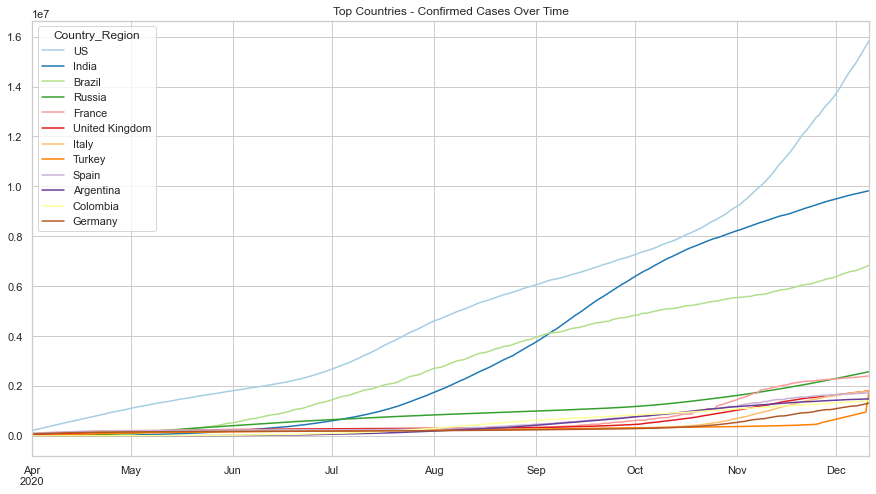

In [19]:
# Plot the top countries confirmed infections over time
jh_hist_countries_cases.loc[zoom_date2:, top_countries.index].plot(figsize=(15,8), title="Top Countries - Confirmed Cases Over Time")

### US State Level

In [20]:
# Top US States by confirmed cases
top_states = jh_live_usstates.nlargest(12, 'Confirmed')
top_states

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long
Province_State,,,,,,,
California,1516215,20787,0,1495428,2020-12-12 05:26:19,37.843962,-120.728594
Texas,1388909,24143,0,1364766,2020-12-12 05:26:19,31.660643,-98.653069
Florida,1106396,19714,0,1086682,2020-12-12 05:26:19,28.940755,-82.700744
Illinois,832951,15067,0,817884,2020-12-12 05:26:19,39.843618,-89.178330
New York,753837,35357,0,718480,2020-12-12 05:26:19,42.544151,-75.474183
Ohio,542209,7426,0,534783,2020-12-12 05:26:19,40.310670,-82.835408
Georgia,531593,10031,0,521562,2020-12-12 05:26:19,32.808532,-83.577430
Pennsylvania,476249,12183,0,464066,2020-12-12 05:26:19,40.818078,-77.615318
Wisconsin,461367,4266,0,457101,2020-12-12 05:26:19,44.395143,-89.797980


<AxesSubplot:title={'center':'Confirmed Cases - Top US States'}>

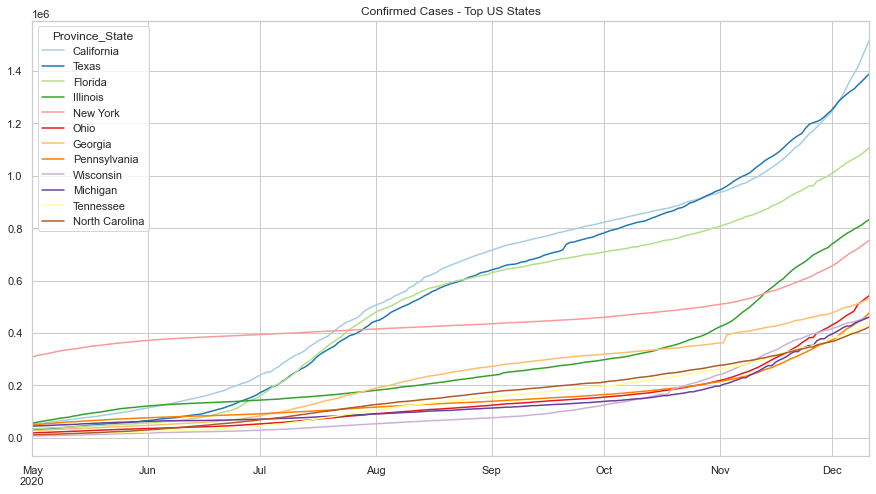

In [21]:
# Chart the top states with confirmed positive
jh_hist_usstates_cases.loc[zoom_date4:, top_states.index].plot(title='Confirmed Cases - Top US States', figsize=(15,8))

<AxesSubplot:title={'center':'Deaths - Top US States'}>

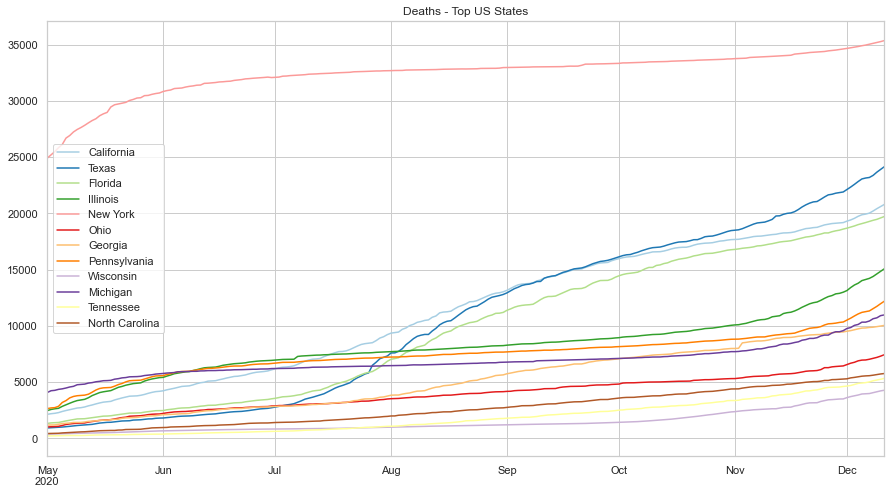

In [22]:
# Chart the top states of by # of deaths
jh_hist_usstates_deaths[top_states.index].loc[zoom_date4:, :].plot(title='Deaths - Top US States', figsize=(15,8))

<AxesSubplot:title={'center':'Deaths - Top US States (ex NY)'}>

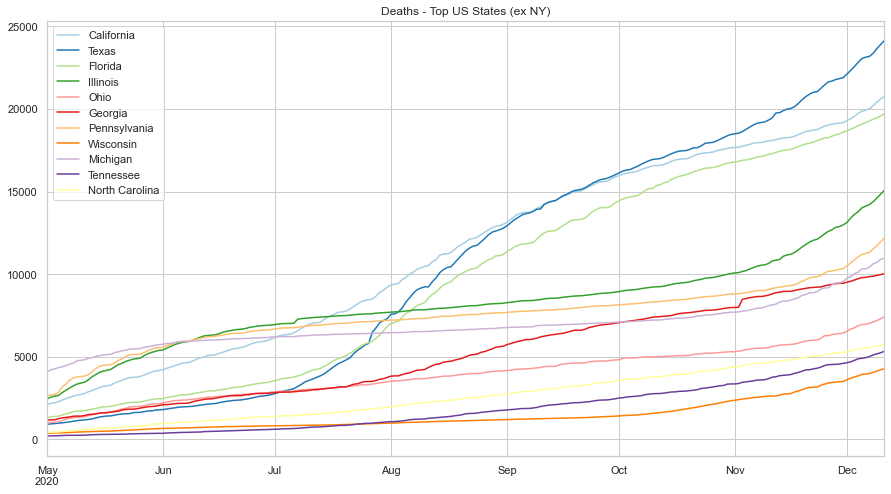

In [23]:
# The same chart but this time without NY to zoom in on the others
jh_hist_usstates_deaths[top_states.index].loc[zoom_date4:, top_states.index != 'New York'].plot(title='Deaths - Top US States (ex NY)', figsize=(15,8))

### US County Level

In [24]:
top_counties_MA = jh_live_uscounties.loc['Massachusetts'].nlargest(12, 'Confirmed')
top_counties_MA.head()

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long,FIPS
Admin2,,,,,,,,
Middlesex,56850,2514,0,54336,2020-12-12 05:26:19,42.486077,-71.390492,25017.0
Essex,44163,1516,0,42647,2020-12-12 05:26:19,42.668763,-70.946872,25009.0
Suffolk,43396,1294,0,42102,2020-12-12 05:26:19,42.327951,-71.078504,25025.0
Worcester,31192,1347,0,29845,2020-12-12 05:26:19,42.350270,-71.904934,25027.0
Bristol,25281,933,0,24348,2020-12-12 05:26:19,41.792284,-71.108722,25005.0


<AxesSubplot:title={'center':'Confirmed Cases - Top MA Counties'}>

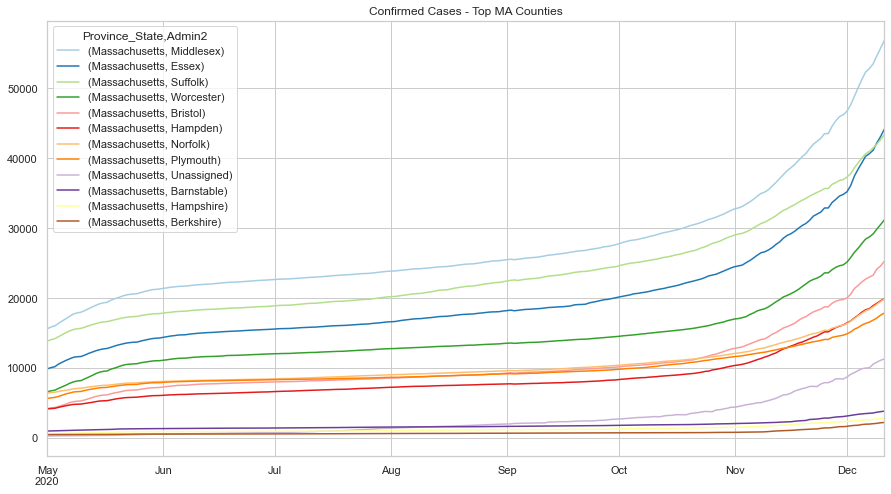

In [25]:
# Chart the MA Counties confirmed cases over time
top_counties_MA_filter = jh_hist_uscounties_cases.loc[jh_hist_date, ('Massachusetts')].nlargest(12).index
top_counties_MA_cases = jh_hist_uscounties_cases.loc[zoom_date4:, ('Massachusetts', top_counties_MA_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_MA_cases.plot(title='Confirmed Cases - Top MA Counties', figsize=(15,8))

<AxesSubplot:title={'center':'Deaths - Top MA Counties'}>

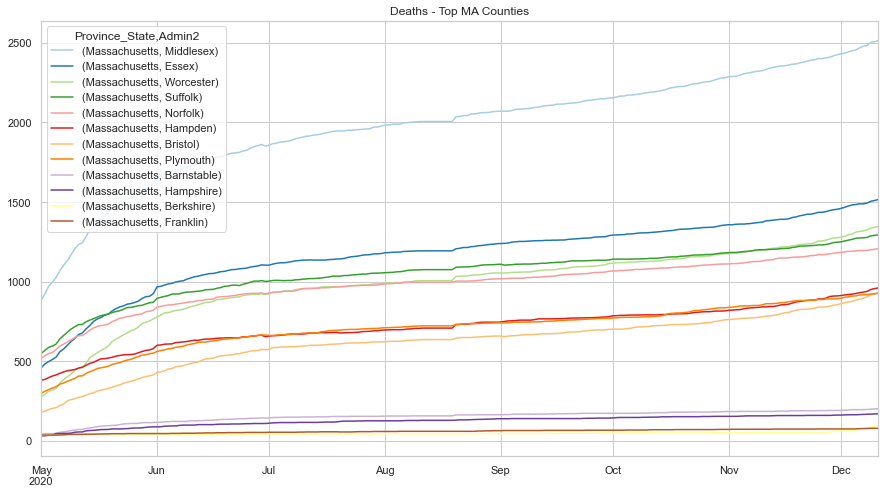

In [26]:
# Chart the MA County deaths over time
top_counties_MA_filter = jh_hist_uscounties_deaths.loc[jh_hist_date, ('Massachusetts')].nlargest(12).index
top_counties_MA_deaths = jh_hist_uscounties_deaths.loc[zoom_date4:, ('Massachusetts', top_counties_MA_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_MA_deaths.plot(title='Deaths - Top MA Counties', figsize=(15,8))

In [27]:
top_counties_CA = jh_live_uscounties.loc['California'].nlargest(12, 'Confirmed')
top_counties_CA.head(5)

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long,FIPS
Admin2,,,,,,,,
Los Angeles,501635,8199,0,493436,2020-12-12 05:26:19,34.308284,-118.228241,6037.0
San Bernardino,120186,1209,0,118977,2020-12-12 05:26:19,34.840603,-116.177469,6071.0
Riverside,112950,1573,0,111377,2020-12-12 05:26:19,33.743150,-115.993358,6065.0
San Diego,99601,1114,0,98487,2020-12-12 05:26:19,33.034846,-116.736533,6073.0
Orange,97302,1662,0,95640,2020-12-12 05:26:19,33.701475,-117.764600,6059.0


<AxesSubplot:title={'center':'Confirmed Cases - Top CA Counties'}>

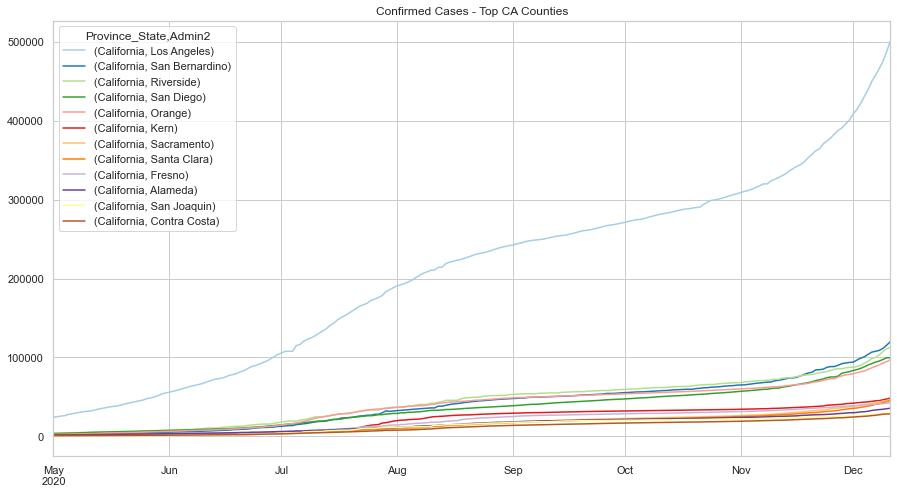

In [28]:
# Chart the CA Counties confirmed cases over time
top_counties_CA_filter = jh_hist_uscounties_cases.loc[jh_hist_date, ('California')].nlargest(12).index
top_counties_CA_cases = jh_hist_uscounties_cases.loc[zoom_date4:, ('California', top_counties_CA_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_CA_cases.plot(title='Confirmed Cases - Top CA Counties', figsize=(15,8))

<AxesSubplot:title={'center':'Confirmed Cases - Top CA Counties (excl Los Angeles)'}>

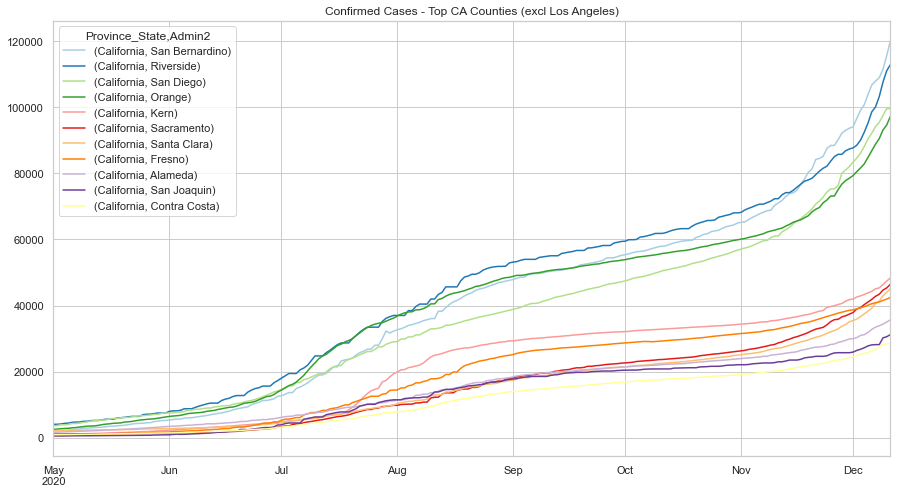

In [29]:
# Same chart but excluding Los Angeles to zoom in on the others
top_counties_CAexLA_cases = top_counties_CA_cases.loc[:, ('California', top_counties_CA_filter != 'Los Angeles')]
top_counties_CAexLA_cases.plot(title='Confirmed Cases - Top CA Counties (excl Los Angeles)', figsize=(15,8))

<AxesSubplot:title={'center':'Deaths - Top CA Counties'}>

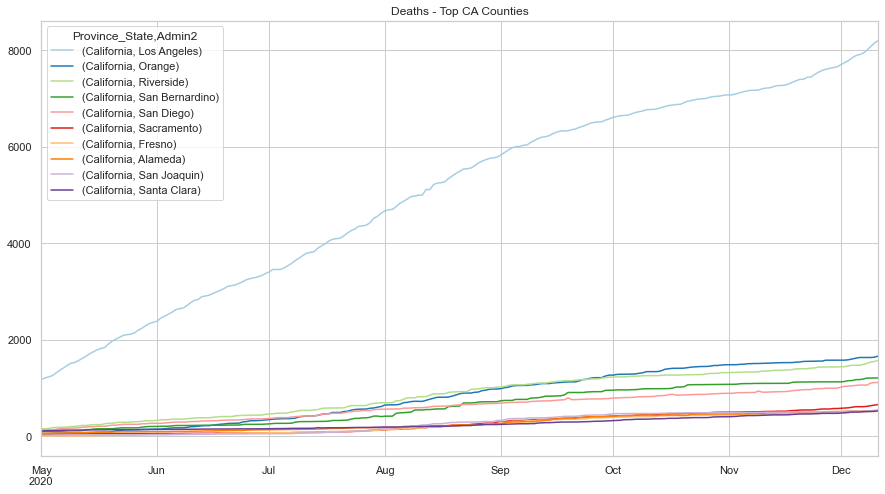

In [30]:
# Chart the CA Counties deaths over time
top_counties_CA_filter = jh_hist_uscounties_deaths.loc[jh_hist_date, ('California')].nlargest(10).index
top_counties_CA_deaths = jh_hist_uscounties_deaths.loc[zoom_date4:, ('California', top_counties_CA_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_CA_deaths.plot(title='Deaths - Top CA Counties', figsize=(15,8))

<AxesSubplot:title={'center':'Deaths - Top CA Counties (excl Los Angeles)'}>

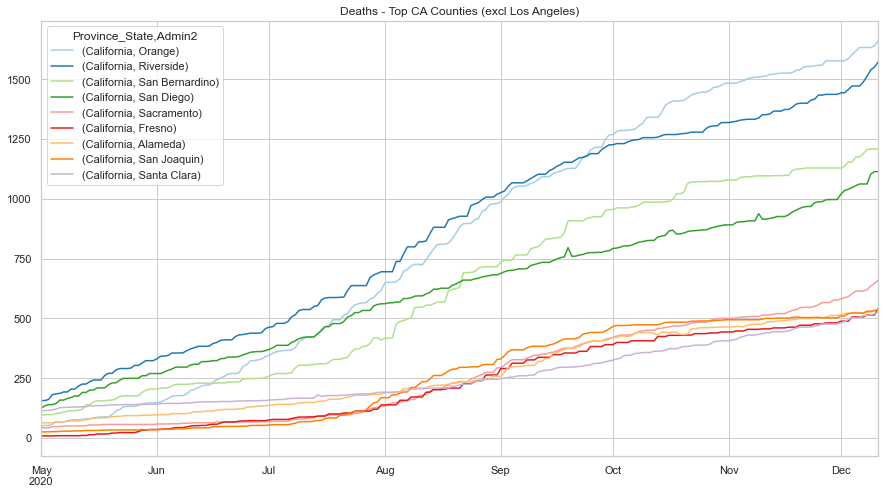

In [31]:
# Same chart but excluding Los Angeles to zoom in on the others
top_counties_CAexLA_deaths = top_counties_CA_deaths.loc[:, ('California', top_counties_CA_filter != 'Los Angeles')]
top_counties_CAexLA_deaths.plot(title='Deaths - Top CA Counties (excl Los Angeles)', figsize=(15,8))

### US Counties - Friends & Family

In [32]:
fnf_counties = [('California', 'Orange'), ('Massachusetts', 'Middlesex'), ('Massachusetts', 'Suffolk'), 
                ('Massachusetts', 'Essex'), ('Massachusetts', 'Bristol')]

#### Live stats for locations where friends and family live

In [33]:
# Add live stats from US Counties of friends & family
fnf_live = jh_live_uscounties.loc[fnf_counties, :]
fnf_live = fnf_live.drop('FIPS', axis=1)

In [34]:
# Add live stats from Costa Rica from the Countries dataset
fnf_cr = jh_live_countries.loc[['Costa Rica']]

In [35]:
# Merge Costa Rica data with US County data
fnf_live.loc[('Costa Rica')] = fnf_cr.loc[('Costa Rica')]

In [36]:
# Display all live data
fnf_live

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long
"(California, Orange)",97302,1662,0,95640,2020-12-12 05:26:19,33.701475,-117.764600
"(Massachusetts, Middlesex)",56850,2514,0,54336,2020-12-12 05:26:19,42.486077,-71.390492
"(Massachusetts, Suffolk)",43396,1294,0,42102,2020-12-12 05:26:19,42.327951,-71.078504
"(Massachusetts, Essex)",44163,1516,0,42647,2020-12-12 05:26:19,42.668763,-70.946872
"(Massachusetts, Bristol)",25281,933,0,24348,2020-12-12 05:26:19,41.792284,-71.108722
Costa Rica,150947,1895,112622,36430,2020-12-12 05:26:19,9.748900,-83.753400


#### Confirmed cases over time in locations where friends and family live

In [37]:
# Add confirmed cases from US Counties of friends & family
fnf_hist_cases = jh_hist_uscounties_cases.loc[:, fnf_counties ]

In [38]:
# Add confirmed cases in Costa Rica from the Countries dataset
fnf_hist_cases[('Costa Rica', '')] = jh_hist_countries_cases['Costa Rica']

In [39]:
# Check the most recent 8 days (week + start)
fnf_hist_cases.tail(8)

Province_State California Massachusetts                        Costa Rica
Admin2             Orange     Middlesex Suffolk  Essex Bristol           
2020-12-04          82887         50108   39360  38467   21819     143685
2020-12-05          84853         51310   40045  39369   22310     143685
2020-12-06          86878         52345   40646  40305   22719     143685
2020-12-07          88842         52839   40982  40666   22997     146421
2020-12-08          90513         53518   41487  41158   23273     147430
2020-12-09          93126         54680   42036  42222   24157     148688
2020-12-10          94647         55765   42667  43110   24598     149815
2020-12-11          97302         56850   43396  44163   25281     150947

In [40]:
# Sort in descending order
fnf_hist_cases.sort_values(jh_hist_date, axis=1, ascending=False, inplace=True)

<AxesSubplot:title={'center':'Confirmed Cases - Counties of Friends & Family'}>

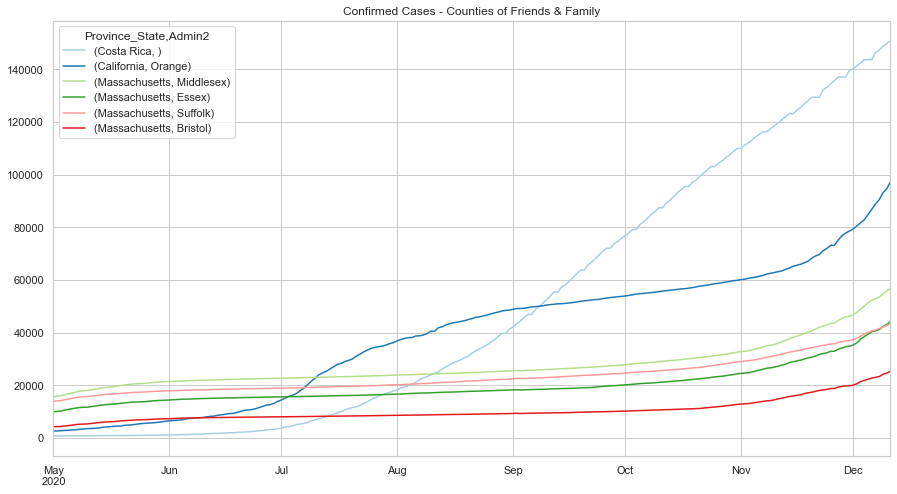

In [41]:
# Plot the data in a chart
fnf_hist_cases.loc[zoom_date4:,:].plot(title='Confirmed Cases - Counties of Friends & Family', figsize=(15,8))

#### Deaths over time in locations where friends and family live

In [42]:
# Add deaths from US Counties of friends & family
fnf_hist_deaths = jh_hist_uscounties_deaths.loc[:, fnf_counties ]

In [43]:
# Add MA "Unassigned" since there are days where deaths are flat on the County level while they are unassigned
fnf_hist_deaths[('Massachusetts', 'Unassigned')] = jh_hist_uscounties_deaths.loc[:, ('Massachusetts', 'Unassigned') ]

In [44]:
# Add deaths in Costa Rica from the Countries dataset
fnf_hist_deaths[('Costa Rica', '')] = jh_hist_countries_deaths['Costa Rica']

In [45]:
# Check the most recent 8 days (week + start)
fnf_hist_deaths.tail(8)

Province_State California Massachusetts                                   \
Admin2             Orange     Middlesex Suffolk Essex Bristol Unassigned   
2020-12-04           1603          2450    1266  1482     877          6   
2020-12-05           1618          2455    1273  1485     885          6   
2020-12-06           1633          2468    1275  1489     890          6   
2020-12-07           1633          2479    1276  1489     896          6   
2020-12-08           1633          2483    1278  1494     906          6   
2020-12-09           1633          2503    1288  1505     917          6   
2020-12-10           1640          2507    1291  1510     921          6   
2020-12-11           1662          2514    1294  1516     933          6   

Province_State Costa Rica  
Admin2                     
2020-12-04           1773  
2020-12-05           1773  
2020-12-06           1773  
2020-12-07           1825  
2020-12-08           1846  
2020-12-09           1864  
2020-12-10           1882  
2020-12-11           1895

In [46]:
# Sort in descending order
fnf_hist_deaths.sort_values(jh_hist_date, axis=1, ascending=False, inplace=True)

<AxesSubplot:title={'center':'Deaths - Counties of Friends & Family'}>

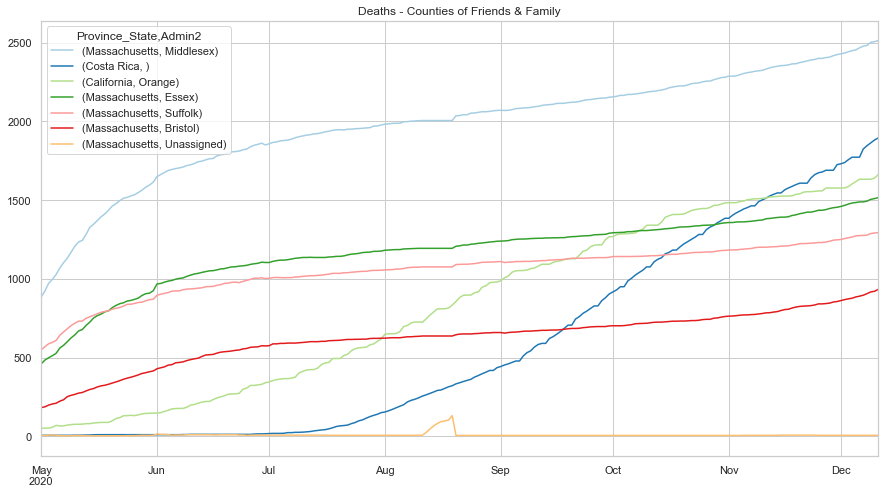

In [47]:
# Plot the data in a chart
fnf_hist_deaths.loc[zoom_date4:,:].plot(title='Deaths - Counties of Friends & Family', figsize=(15,8))